In [1]:
import numpy as np
from numpy.fft import fft, fftshift, fftfreq
import matplotlib.pyplot as plt

In [2]:
M = 21
N = 3
num_dados = 2*M + 1
grau = N + 1

A = np.zeros((num_dados, grau))

for n in range(A.shape[0]):
    for i in range(A.shape[1]):
        A[n, i] = (n-M)**i

print(A)
H = np.linalg.inv(A.transpose() @ A) @ A.transpose()

[[ 1.000e+00 -2.100e+01  4.410e+02 -9.261e+03]
 [ 1.000e+00 -2.000e+01  4.000e+02 -8.000e+03]
 [ 1.000e+00 -1.900e+01  3.610e+02 -6.859e+03]
 [ 1.000e+00 -1.800e+01  3.240e+02 -5.832e+03]
 [ 1.000e+00 -1.700e+01  2.890e+02 -4.913e+03]
 [ 1.000e+00 -1.600e+01  2.560e+02 -4.096e+03]
 [ 1.000e+00 -1.500e+01  2.250e+02 -3.375e+03]
 [ 1.000e+00 -1.400e+01  1.960e+02 -2.744e+03]
 [ 1.000e+00 -1.300e+01  1.690e+02 -2.197e+03]
 [ 1.000e+00 -1.200e+01  1.440e+02 -1.728e+03]
 [ 1.000e+00 -1.100e+01  1.210e+02 -1.331e+03]
 [ 1.000e+00 -1.000e+01  1.000e+02 -1.000e+03]
 [ 1.000e+00 -9.000e+00  8.100e+01 -7.290e+02]
 [ 1.000e+00 -8.000e+00  6.400e+01 -5.120e+02]
 [ 1.000e+00 -7.000e+00  4.900e+01 -3.430e+02]
 [ 1.000e+00 -6.000e+00  3.600e+01 -2.160e+02]
 [ 1.000e+00 -5.000e+00  2.500e+01 -1.250e+02]
 [ 1.000e+00 -4.000e+00  1.600e+01 -6.400e+01]
 [ 1.000e+00 -3.000e+00  9.000e+00 -2.700e+01]
 [ 1.000e+00 -2.000e+00  4.000e+00 -8.000e+00]
 [ 1.000e+00 -1.000e+00  1.000e+00 -1.000e+00]
 [ 1.000e+00 

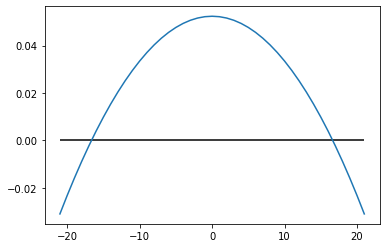

In [3]:
x = np.array([i for i in range(-M, M+1)])

plt.hlines(0,x.min(), x.max(), color="black")
plt.plot(x, H[0, :])

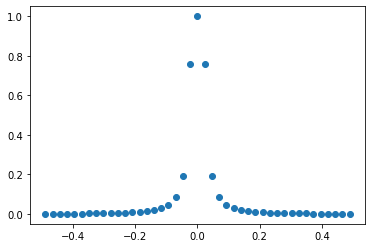

In [4]:
h = fftshift(fft(H[0, :]))
f = fftshift(fftfreq(h.shape[0]))
plt.scatter(f, np.abs(h))

In [5]:
69/(1/0.000195)

0.013455

# Frequency response

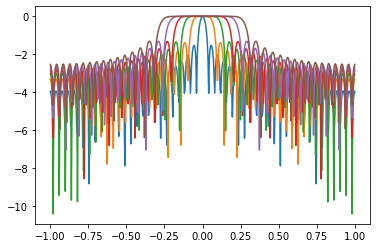

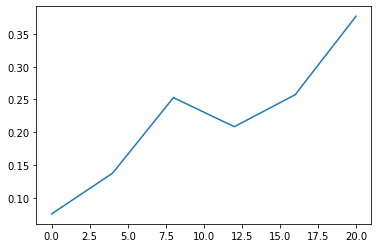

In [7]:
M = 25
N = 0

cutoff = []
Ns = []
for N in range(0, M-1, 4):
    num_dados = 2*M + 1
    grau = N + 1

    A = np.zeros((num_dados, grau))

    for n in range(A.shape[0]):
        for i in range(A.shape[1]):
            A[n, i] = (n-M)**i

    H = np.linalg.inv(A.transpose() @ A) @ A.transpose()

    h = H[0, :]

    res = np.convolve([int(i==0) for i in range(-200, 201)], h)

    h = fftshift(fft(res))
    f = fftshift(fftfreq(h.shape[0]))
    plt.plot(f*2, np.log(np.abs(h)))
    h = h[f >= 0]
    f = f[f >= 0]
    diff = np.abs(np.log(h) + 3)
    
    cutoff.append(2*f[np.argmin(diff)])
    Ns.append(N)
plt.show()

plt.plot(Ns, cutoff)

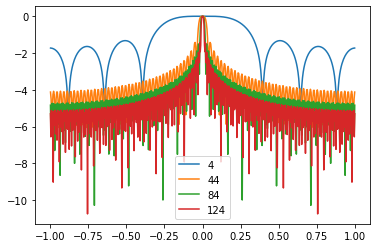

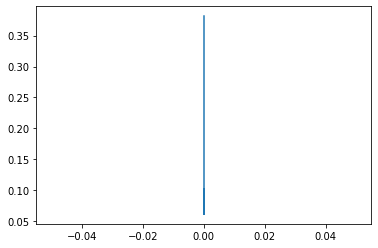

In [15]:
M = 125
N = 0

cutoff = []
Ns = []
for M in range(4, M, 40):
    num_dados = 2*M + 1
    grau = 3

    A = np.zeros((num_dados, grau))

    for n in range(A.shape[0]):
        for i in range(A.shape[1]):
            A[n, i] = (n-M)**i

    H = np.linalg.inv(A.transpose() @ A) @ A.transpose()

    h = H[0, :]

    res = np.convolve([int(i==0) for i in range(-200, 201)], h)

    h = fftshift(fft(res))
    f = fftshift(fftfreq(h.shape[0]))
    plt.plot(f*2, np.log(np.abs(h)), label=M)
    h = h[f >= 0]
    f = f[f >= 0]
    diff = np.abs(np.log(h) + 3)
    
    cutoff.append(2*f[np.argmin(diff)])
    Ns.append(N)

plt.legend()
plt.show()

plt.plot(Ns, cutoff)


In [104]:
69 / (1 / 0.000195) * 2

0.02691

In [71]:
h = H[0, :]

In [72]:
print(h[-1])
print(h[0])

-3.5746749599125745e-05
-0.031007751937984496
